In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
local_csv = './Data/combine_data_since_2000_PROCESSED_2018-04-26.csv'

In [32]:
df = pd.read_csv(local_csv)
df = df.query("Pos == 'ILB'")
df.isnull().sum()

Player         0
Pos            0
Ht             0
Wt             0
Forty         11
Vertical      63
BenchReps     60
BroadJump     64
Cone         111
Shuttle      104
Year           0
Pfr_ID        45
AV             0
Team         105
Round        105
Pick         105
dtype: int64

In [33]:
df = df[df['Round'].notnull()]
df = df[df['Cone'].notnull()]
df = df[df['BenchReps'].notnull()]
df = df[df['Shuttle'].notnull()]
df = df[df['BroadJump'].notnull()]
df = df[df['Pfr_ID'].notnull()]

In [34]:
df.isnull().sum()

Player       0
Pos          0
Ht           0
Wt           0
Forty        0
Vertical     0
BenchReps    0
BroadJump    0
Cone         0
Shuttle      0
Year         0
Pfr_ID       0
AV           0
Team         0
Round        0
Pick         0
dtype: int64

In [35]:
df.shape

(80, 16)

In [36]:
df.Round.value_counts().sort_values()
y = df['Round']

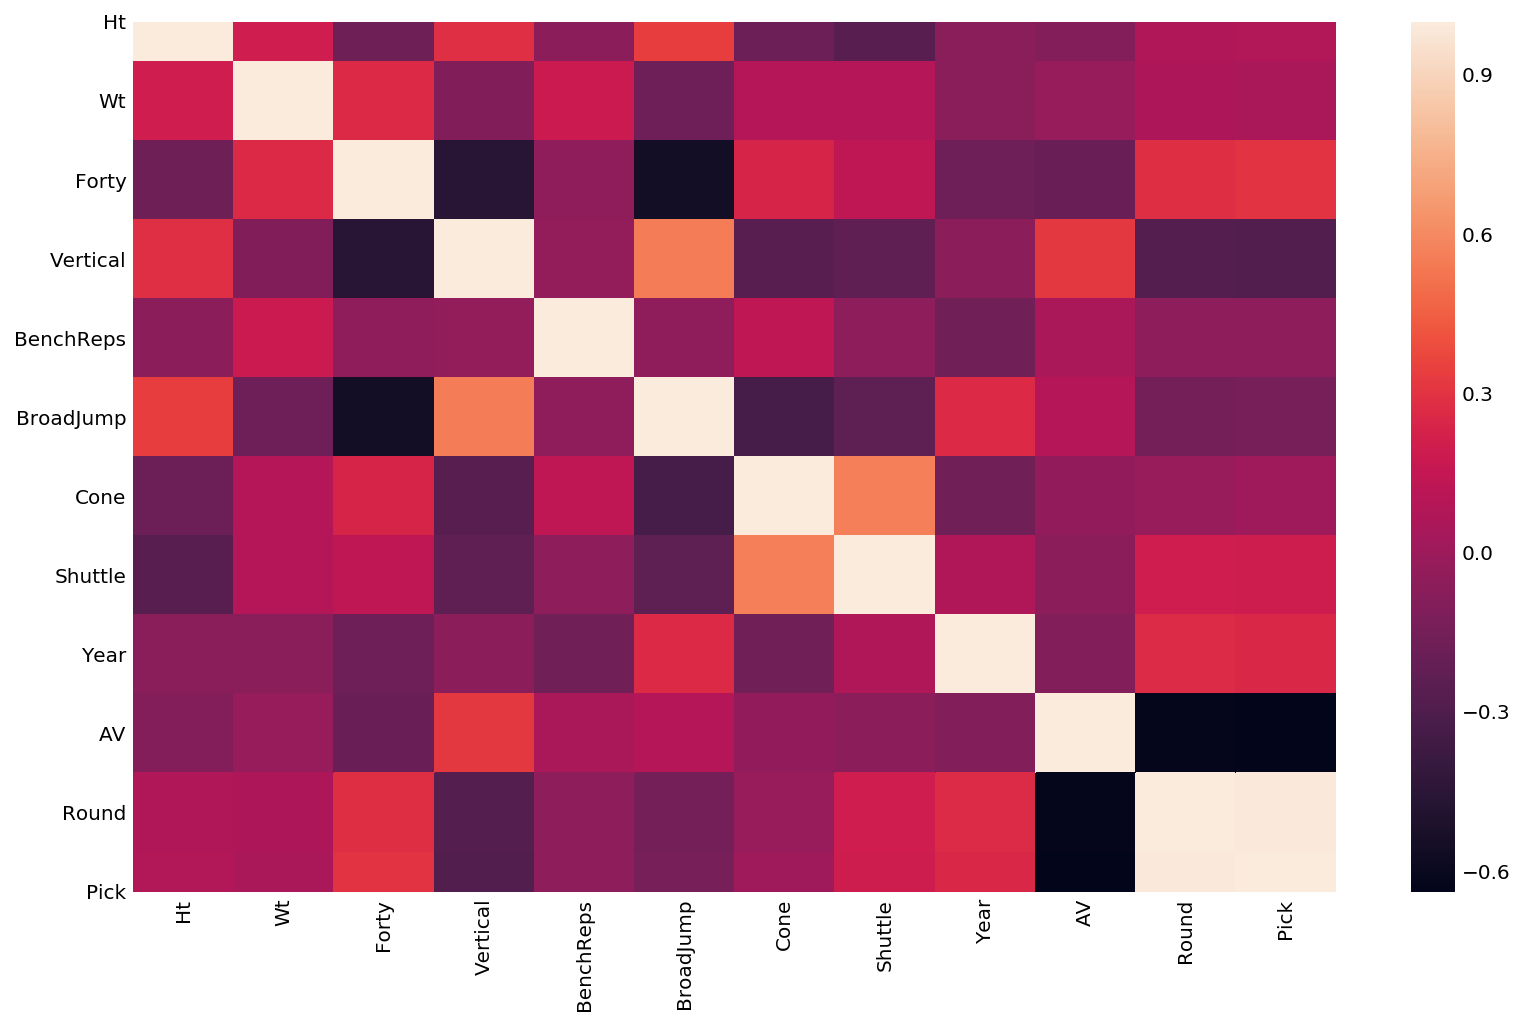

In [37]:
#quick test
plt.figure(figsize=(12,8))
sns.heatmap(df.corr())
df.corr()['Round'].sort_values()
X = df[['Ht','Wt', 'Forty', 'Vertical', 'BroadJump', 'Cone', 'Shuttle', 'BenchReps']]

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((56, 8), (24, 8), (56,), (24,))

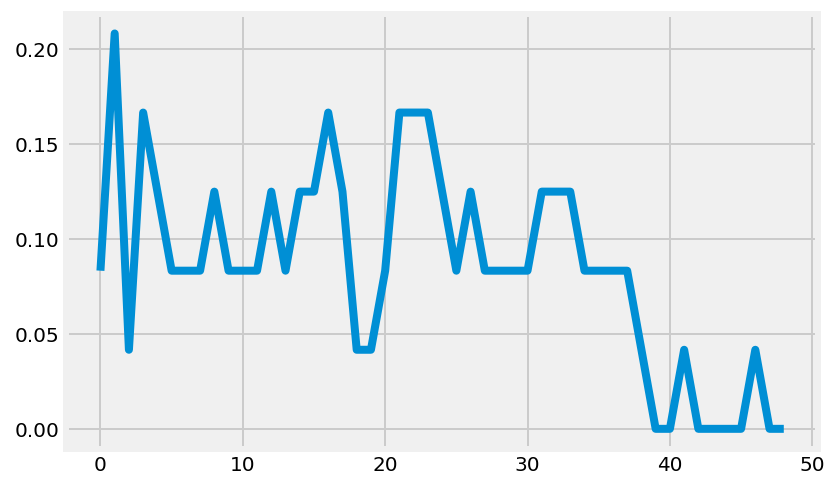

In [40]:
from sklearn.neighbors import KNeighborsClassifier

scores = dict()
scores_list = []

for k in range(1, 50):
    kn = KNeighborsClassifier(k)
    kn.fit(X_train,y_train)
    score = kn.score(X_test,y_test)
    scores[k] = score
    scores_list.append(score)
    
plt.plot(scores_list);

In [41]:
# Instantiate
kn = KNeighborsClassifier(n_neighbors = 17)

# Fit
kn.fit(X,y)

# Predict
kn_preds = kn.predict(X)

# Score
kn.score(X,y)

0.275